##Mostafa Osama Elsharakawy <br> Last edit : 15th, August, 2022

---



---



###About the Problem :<br>
This is classification problem. The model is a logistic regression model that classifies cases as having diabetes or not.<br> It achieved an accuracy of 72.39%


---




### **Import Packages, Functions, and Classes**

In [112]:
# import required modules
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### **Get Data**

In [113]:
!wget https://nrvis.com/data/mldata/pima-indians-diabetes.csv

--2022-08-14 22:17:16--  https://nrvis.com/data/mldata/pima-indians-diabetes.csv
Resolving nrvis.com (nrvis.com)... 173.236.176.48
Connecting to nrvis.com (nrvis.com)|173.236.176.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23279 (23K) [text/csv]
Saving to: ‘pima-indians-diabetes.csv.7’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.007s  

2022-08-14 22:17:16 (3.03 MB/s) - ‘pima-indians-diabetes.csv.7’ saved [23279/23279]



In [114]:
# Data Is Coming Without Column Names - Just Adding it
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv('pima-indians-diabetes.csv', header=None, names=col_names)

In [115]:
# Calculating Data Shape
data.shape

(768, 9)

In [116]:
# Checking Data Entries (Get Head)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###**Selecting Features:**

In [117]:
#splitting dataset in features and target variable
# Input Features
feature_cols =  data[['pregnant'	,'glucose',	'bp',	'skin',	'insulin',	'bmi',	'pedigree',	'age']]

# Target variable
y = data['label']

### **Splitting Data**

In [118]:
# split X and y into training and testing sets
# X_train,X_test,y_train,y_test=
X_train,X_test,y_train,y_test = train_test_split(feature_cols, y, test_size=.25, random_state=42, shuffle = True)
# Split Data here with 75% train & 25% test


Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

### **Model Development and Prediction** 

In [119]:
# logistic_reg = 
model = LogisticRegression(solver='lbfgs', max_iter=1000)
# fit the model with data Using X_train y_train
model.fit(X_train, y_train)

# Predict y_red Using X_test
y_pred = model.predict(X_test)

### **Model Evaluation using Confusion Matrix**

In [120]:
# import the metrics class
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[95, 28],
       [25, 44]])

In [121]:
# Calculating Accuracy --> Total Correct / Total Entries 
total = conf_matrix[0][0] + conf_matrix[1][1] + conf_matrix[0][1] + conf_matrix[1][0]
Accuracy = (conf_matrix[0][0] + conf_matrix[1][1]) / total
print(Accuracy)

0.7239583333333334


### **Visualizing Confusion Matrix using Heatmap**

Text(0.5, 257.44, 'Predicted label')

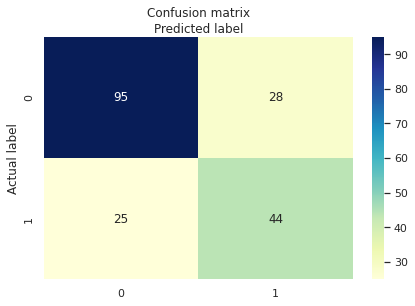

In [122]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# creating heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### **Confusion Matrix Evaluation Metrics**

In [123]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7239583333333334
Precision: 0.6111111111111112
Recall: 0.6376811594202898
